Trilha 4: Tarefa (Peso 3)
Empregue no mínimo duas bases de dados (tabelas) extraídas de um ou ambos os sites abaixo: 

 

a. https://wid.world/ ; 

b. https://www.gapminder.org/  

 

E faça uma Exploração dos Dados EDA de seu interesse, empregando o Python e o que você aprendeu até aqui. Os sites apresentam diversos dados sobre as diferenças de desenvolvimento dos países e a desigualdade. Foque em perguntas que são do seu interesse sobre os dados. 

Na sua análise você deve responder ao menos quatro perguntas relevantes sobre os dados, incluir na sua análise seleções e visualizações dos dados e um texto de conclusão a cada pergunta. 

Peça ao professor modelos de código para sua implementação. 

Seu código deve ser minimamente claro e organizado. Não são necessários comentários detalhados, mas deixe claro no seu código cada parte (atividade), cada fase realizada e a resposta final com sua conclusão. 

 

Entrega:  

.pdf de print do seu notebook Python. 

Compartilhe o endereço do seu notebook Python (Google Drive ou GitHub) 100% executável para abertura no Google Colab.  

Não deixe de incluir o seu texto uma introdução justificando a escolha da análise e ao final suas conclusões. 

Perguntas:



1.   Em que período o índice de Gini melhorou no Brasil?
2.   Como o Brasil se posiciona no índice de Gini em relação aos países desenvolvidos?
3. Em que período houve mais dados sobre a pobreza no Brasil?
4. Como a pobreza urbana e rural do Brasil se modificaram com o tempo?

In [ ]:
# Importando Bibliotecas e adicionando seus respectivos alias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

In [ ]:
#Importando os df: Gini, Rural, Urban
# Fonte: https://www.gapminder.org/data

dfGini = pd.read_csv('https://raw.githubusercontent.com/rodglins/Python/master/desafios/exploracaoDados/gini.csv')
dfRural = pd.read_csv('https://raw.githubusercontent.com/rodglins/Python/master/desafios/exploracaoDados/rural.csv')
dfUrban = pd.read_csv('https://raw.githubusercontent.com/rodglins/Python/master/desafios/exploracaoDados/urban.csv')


In [ ]:
# verificando o formato do df
dfGini.head()


,country,1966,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.3,NaN
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,NaN,NaN,NaN,NaN,NaN,31.7,NaN,NaN,30.6,NaN,NaN,30.0,NaN,NaN,NaN,29.0,NaN,34.6,32.9,33.7,33.2,NaN,NaN
2,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.5,NaN,NaN,NaN,NaN,26.0,NaN
3,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.8,NaN,NaN,NaN,NaN,NaN,42.8,45.3,NaN,NaN,NaN,46.8,45.5,44.9,45.9,48.9,49.5,49.1,50.7,49.8,51.1,53.3,53.8,50.9,48.4,47.7,46.3,46.2,44.9,43.7,43.6,42.6,41.3,40.9,41.6,NaN,42.0,41.1,41.3,42.9
4,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.2,NaN,35.4,34.8,33.0,37.5,36.0,29.7,31.2,29.2,28.0,30.0,29.4,29.6,30.6,31.5,32.4,32.5,33.6,34.4,29.9


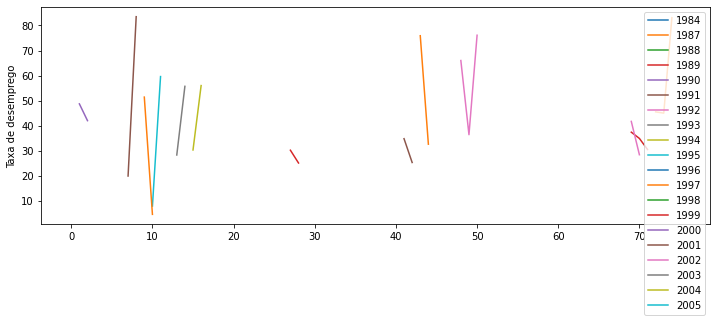

In [ ]:
# tentando usar o df atual sem tratamento

plt.figure(figsize=(12,4))

plt.plot(dfRural.iloc[:, 1:53]) # considerando as colunas 1 a 53
plt.ylabel("Taxa de desemprego")

plt.legend(dfRural.columns[1:53]) # nomes das colunas 1 a 53
plt.show()

In [ ]:
# reshape / não funcionou

dfGiniTeste = pd.read_csv('https://raw.githubusercontent.com/rodglins/Python/master/desafios/exploracaoDados/gini.csv')

dfGiniTeste = pd.pivot(dfGiniTeste,columns=['country'],values='country',index='country').reset.index()
dfGiniTeste = dfGiniTeste.rename_axis('',axis='columns')
dfGiniTeste.head()

ValueError: ignored

In [ ]:
# tratando os dados, transferindo dados de ano de colunas para linhas, e seus respectivos valores
dfGini = pd.melt(dfGini.reset_index(), id_vars=['country','index'], var_name='ano', value_name='valor').sort_values(['country','valor'], ascending=False)
dfGini.head()

,country,index,ano,valor
8683,Zimbabwe,166,2018,50.3
8349,Zimbabwe,166,2016,44.3
7347,Zimbabwe,166,2010,43.2
166,Zimbabwe,166,1966,NaN
333,Zimbabwe,166,1968,NaN


In [ ]:
# transformando campo ano para o formato data

dfGini.ano = pd.to_datetime(dfGini.ano, format='%Y',errors='coerce')
display(dfGini.dtypes)

country            object
index               int64
ano        datetime64[ns]
valor             float64
dtype: object

In [ ]:
# resetando o index

dfGini = dfGini.reset_index()
dfGini.head()

,level_0,country,index,ano,valor
0,8683,Zimbabwe,166,2018-01-01,50.3
1,8349,Zimbabwe,166,2016-01-01,44.3
2,7347,Zimbabwe,166,2010-01-01,43.2
3,166,Zimbabwe,166,1966-01-01,NaN
4,333,Zimbabwe,166,1968-01-01,NaN


In [ ]:
# Este não funcionou:
plt.plot(dfGini_not_null["ano"],dfGini_not_null["valor"],label="Valor")
plt.legend()
plt.show()



In [ ]:
# Este não funcionou:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(dfGini["ano"],dfGini["valor"],label="Gini Mundo",marker="o", markersize=4)
plt.ylabel("Taxa de gini mundo")
plt.show()

NameError: ignored

### **Concatenando Dataframes**



*   DfRural + dfUrban



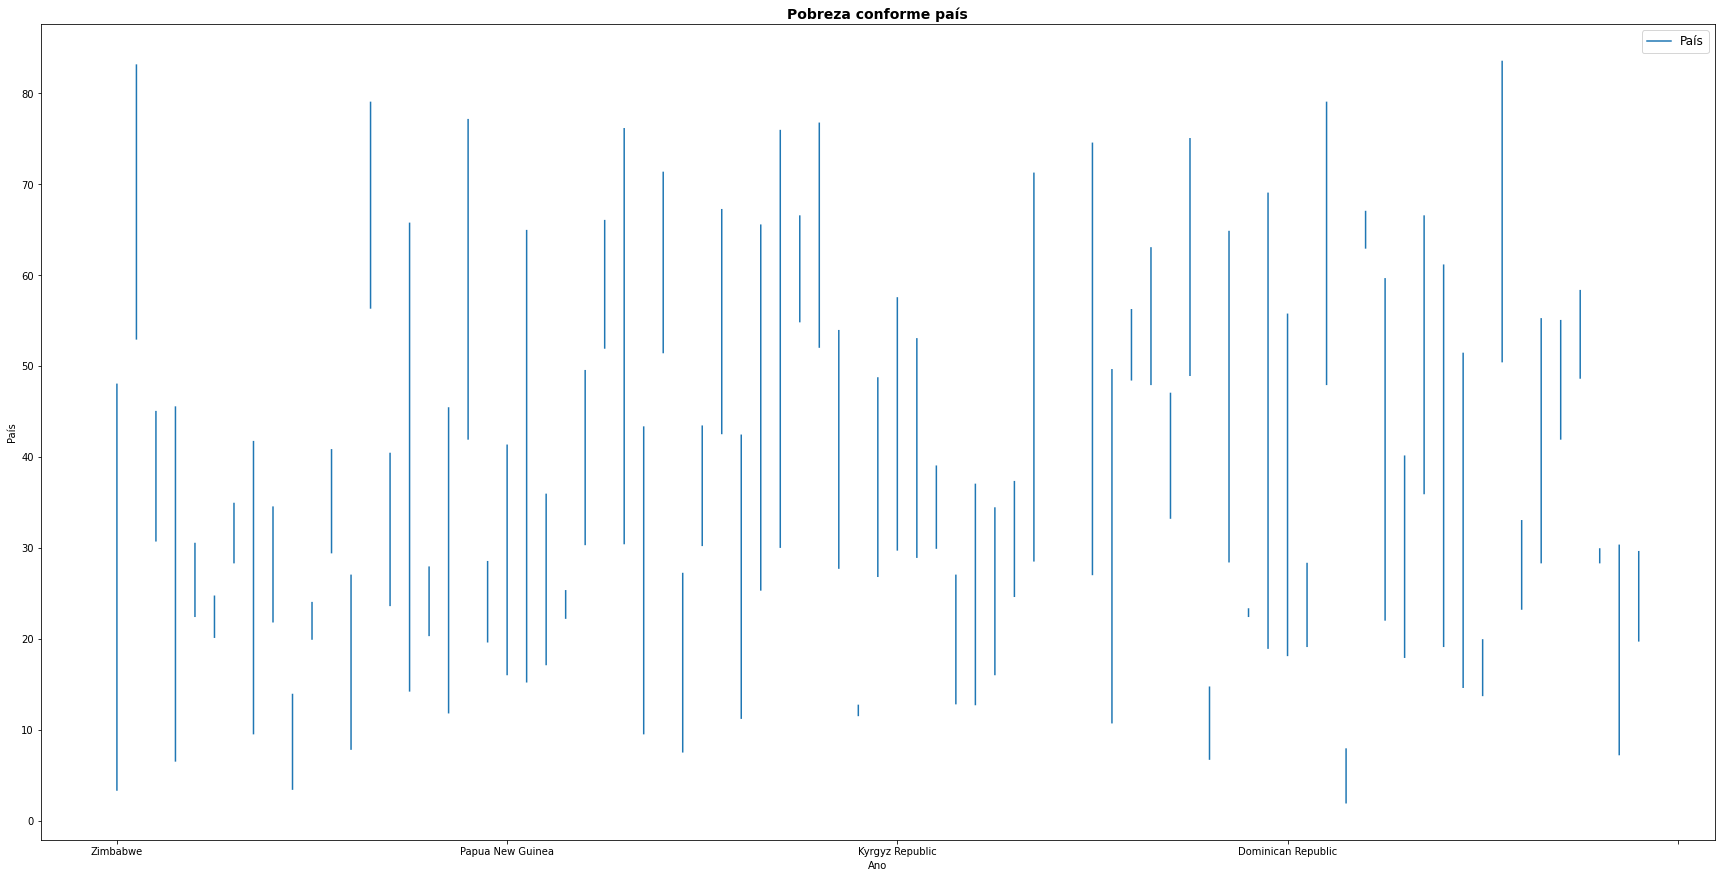

In [ ]:
# tentando elaborar gráfico mas não funcionou. Ele possui dados duplicados de cenário rural e urbano. 

fig, ax = plt.subplots(figsize=(30,15))
ax.plot(df_concat.country, df_concat.valor, label='País')

ax.set_title('Pobreza conforme país', fontsize=14, weight='bold')
ax.set_xlabel("Ano")
ax.set_ylabel("País")

# z=np.polyfit(df_concat.index,df_concat.index, 1)
# z = np.polyfit(df_concat.ano.dt.year,df_concat.ano,1)
p = np.poly1d(z)
#ax.plot(df_concat.index,p(df_concat.index), linestyle='dashed', label='Linear(x)', linewidth=2, color='k')
# ax.plot(df_concat.ano,p(df_concat.ano.dt.year), linestyle='dashed', label='Linear(x)', linewidth=2, color='k')

ax.legend(fontsize=12)
import matplotlib.ticker as ticker

ax.xaxis.set_major_locator(ticker.MaxNLocator(5))
#ax.set_xticklabels(df_concat.ano)
plt.show()


### **Tratando dados Dataframe Rural**

Text(0.5, 1.0, 'Pobreza Rural - Brasil')

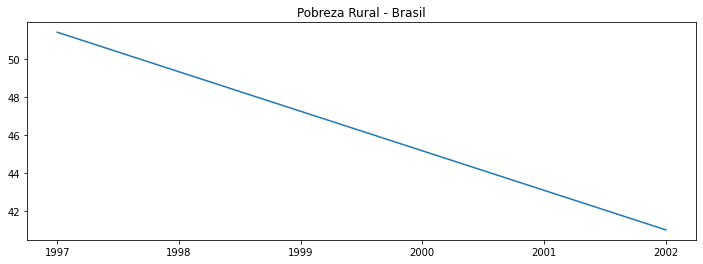

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(dfRural4[dfRural4.country == 'Brazil'].ano, dfRural4[dfRural4.country == 'Brazil'].valor)
plt.title('Pobreza Rural - Brasil')

# Gráfico mostra uma situação de queda mas não apresenta os dados de forma correta

### **Realizando a comparação**

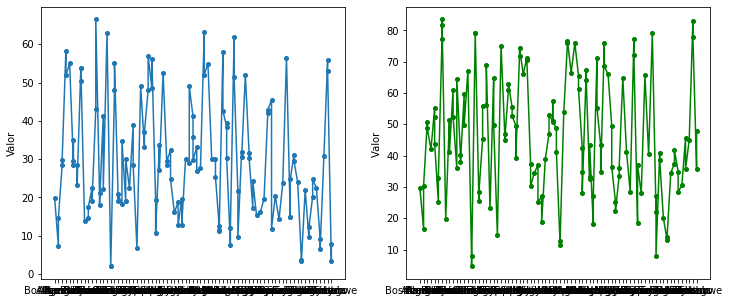

In [ ]:
# Grafico de linha comparativo entre Pobreza Rural e Urbana no mundo
# Gráfico com formato incorreto, não funcionou
# Não é possível fazer inferências com esse gráfico.

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(dfUrban4["country"],dfUrban4["valor"],label="Ano",marker="o", markersize=4)
plt.ylabel("Valor")

plt.subplot(1,2,2)
plt.plot(dfRural4["country"],dfRural4["valor"],label="Ano",color="green",marker="o", markersize=4)
plt.ylabel("Valor ")

plt.show()

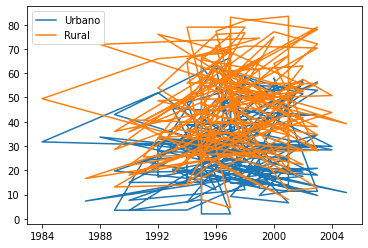

In [ ]:
# outro erro em gerar o gráfico:

plt.plot(dfUrban4["ano"],dfUrban4["valor"],label="Urbano")
plt.plot(dfRural4["ano"],dfRural4["valor"],label="Rural")

plt.legend()
plt.show()

In [ ]:
# coluna com a data por trimestre (quarter) usando a função "date_range" de Pandas
pd.date_range(start='1/1/1980', periods=8*21, freq='Q')

DatetimeIndex(['1980-03-31', '1980-06-30', '1980-09-30', '1980-12-31',
               '1981-03-31', '1981-06-30', '1981-09-30', '1981-12-31',
               '1982-03-31', '1982-06-30',
               ...
               '2019-09-30', '2019-12-31', '2020-03-31', '2020-06-30',
               '2020-09-30', '2020-12-31', '2021-03-31', '2021-06-30',
               '2021-09-30', '2021-12-31'],
              dtype='datetime64[ns]', length=168, freq='Q-DEC')

ValueError: ignored

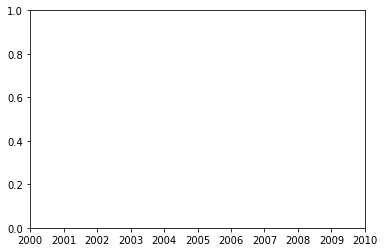

In [ ]:
# Usar a variável "Quarter" no eixo x (o gráfico não funcionou)
Quarter=pd.date_range(start='1/1/1980', periods=8*21, freq='Q')

plt.plot(Quarter,dfUrban4['valor'])
plt.ylabel("Pobreza Urbana")
plt.title("Urbana- Brasil")
plt.show()